In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score


In [3]:
#in this cell we've tried to define the exact n_components value
# Load the dataset
df = pd.read_csv('countries.csv',usecols=['Country','Carbon Footprint'],index_col='Country')
#Replace null values
df = df.fillna(df.mean())
print(df)

                           Carbon Footprint
Country                                    
Afghanistan                        0.180000
Albania                            0.870000
Algeria                            1.140000
Angola                             0.200000
Antigua and Barbuda                1.804913
...                                     ...
Viet Nam                           0.790000
Wallis and Futuna Islands          1.804913
Yemen                              0.420000
Zambia                             0.240000
Zimbabwe                           0.530000

[188 rows x 1 columns]


In [4]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Carbon Footprint']])
df_scaled = np.nan_to_num(df_scaled, nan=0)

In [5]:
dist = pdist(df_scaled, metric='euclidean')

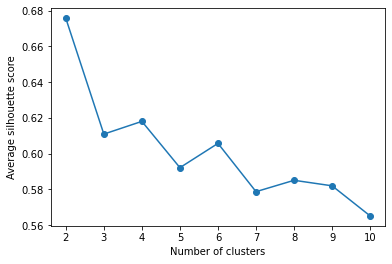

In [6]:
linkage_matrix = linkage(df_scaled, method='ward')
silhouette_scores = []
for i in range(2, 11):
    clusters = fcluster(linkage_matrix, i, criterion='maxclust')
    silhouette_scores.append(silhouette_score(df_scaled, clusters))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette score')
plt.show()

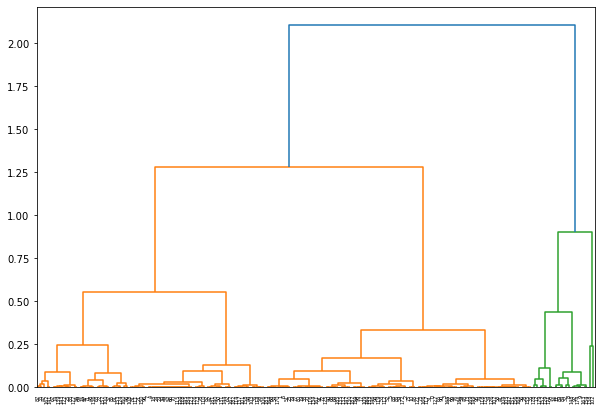

In [7]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

In [8]:
clusters = fcluster(linkage_matrix, 30, criterion='maxclust')

In [9]:
df['Cluster'] = clusters

In [10]:
print(df.groupby('Cluster')['Carbon Footprint'].mean())

Cluster
1     12.650000
2      9.570000
3      4.196667
4      4.925000
5      4.517500
6      6.890000
7      5.870000
8      6.280000
9      0.066316
10     0.270000
11     0.170714
12     1.243333
13     1.041429
14     0.524000
15     0.404444
16     0.655455
17     0.853333
18     2.123636
19     1.560000
20     1.418333
21     1.932500
22     1.803356
23     1.708333
24     2.975000
25     2.785000
26     2.348000
27     2.586667
28     3.241111
29     3.875000
30     3.556667
Name: Carbon Footprint, dtype: float64
